In [1]:
# following the tutorial from https://www.kaggle.com/stkbailey/teaching-notebook-for-total-imaging-newbies
# learning how to load and format image data

In [2]:
import pathlib
import numpy as np
import imageio

### Setting training image file paths

In [3]:
# define directory path for training images
# go up one directory level for Data folder
nuclei_dir = '../Data/Nuclei/data-science-bowl-2018/stage1_train'

In [7]:
# verify directory path exists
import os
print(os.path.exists(nuclei_dir))
print(os.path.isdir(nuclei_dir))

True
True


In [14]:
# use glob to create list of file names in training directory
train_paths = pathlib.Path(nuclei_dir).glob('*/images/*.png')

In [15]:
print(type(train_paths))

<class 'generator'>


In [16]:
train_sorted = sorted(list(train_paths))

In [20]:
type(train_sorted[0])

pathlib.PosixPath

In [18]:
train_sorted[0:3]

[PosixPath('../Data/Nuclei/data-science-bowl-2018/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png'),
 PosixPath('../Data/Nuclei/data-science-bowl-2018/stage1_train/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1/images/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1.png'),
 PosixPath('../Data/Nuclei/data-science-bowl-2018/stage1_train/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png')]

In [19]:
# type cast Path objects into strings
str(train_sorted[0])

'../Data/Nuclei/data-science-bowl-2018/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png'

#### Load image

In [21]:
# load image 46
im = imageio.imread(str(train_sorted[45]))

In [25]:
# inspect image
print(len(im))
print(type(im))
print(im.shape)

520
<class 'imageio.core.util.Array'>
(520, 696, 4)


In [26]:
# image is 520x696 pixels, 4 channels, RGB Alpha

### Handling Colour

In [27]:
# convert colour images into grayscale
from skimage.color import rgb2gray

In [28]:
im_gray = rgb2gray(im)

In [29]:
# image is clipped to a single channel array
print(im_gray.shape)

(520, 696)


In [49]:
# visualise images using pyplot
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

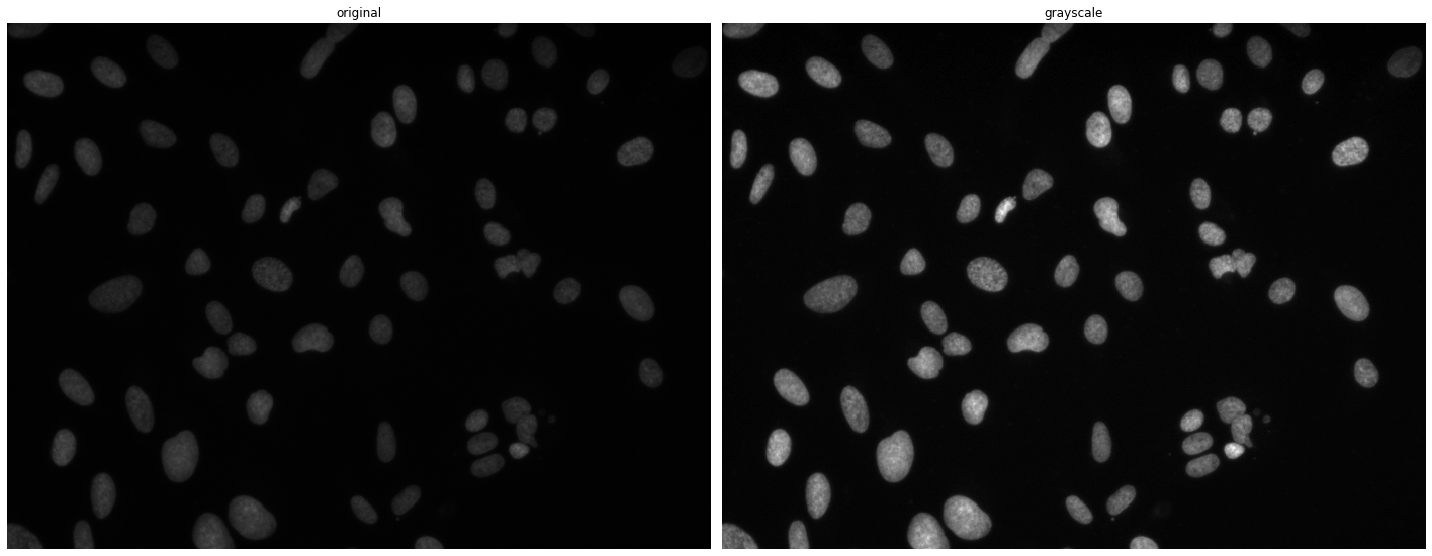

In [51]:
# create figure subplot 
# display images side by side
# plt.figure(figsize=(12,10), dpi=200) # set figure size // depracated by rcParams

# plot original image as index 1 (zero)
plt.subplot(1,2,1) # define subplot 1,2, x n_cols, n_rows, index
plt.imshow(im) # show original image
plt.axis('off') # disable plot axes
plt.title('original')

# plot grayscale clipped image
plt.subplot(1,2,2) # index 2 (one)
plt.imshow(im_gray, cmap='gray') # define colour map as gray to render image in range [0,1] K values
plt.axis('off')
plt.title('grayscale')

# clean up and display plots
plt.tight_layout()
plt.show()

### Bimodal Separation
In cases where an image has a background and values of interest, we can transform the image into a bimodal distribution of intensity values to create a boundary or mask elements from the background.

Use the OTSU method to find the optimal threshold value

In [53]:
# filtering an image using otsu threshold
from skimage.filters import threshold_otsu

In [54]:
# initialise otsu on grayscale image
otsu_threshold = threshold_otsu(im_gray)

In [56]:
print(type(otsu_threshold))
print(otsu_threshold)

<class 'numpy.float64'>
0.08195465686274508


In [68]:
# use np where for (condition, x, else y)
# create hard mask using threshold value
mask = np.where(im_gray > otsu_threshold, 1, 0)

In [105]:
# returns an array of clipped values
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [106]:
# use threshold value to clip image to lower and upper boundaries

In [95]:
np.sum(mask==0)

322049

In [97]:
filter_im = mask.copy()

In [98]:
if np.sum(mask==0) < np.sum(mask==1):
    filter_im = np.where(mask, 0, 1)

In [99]:
np.where(filter_im, filter_im, np.nan)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan]])

Text(0.5, 1.0, 'K value distribution')

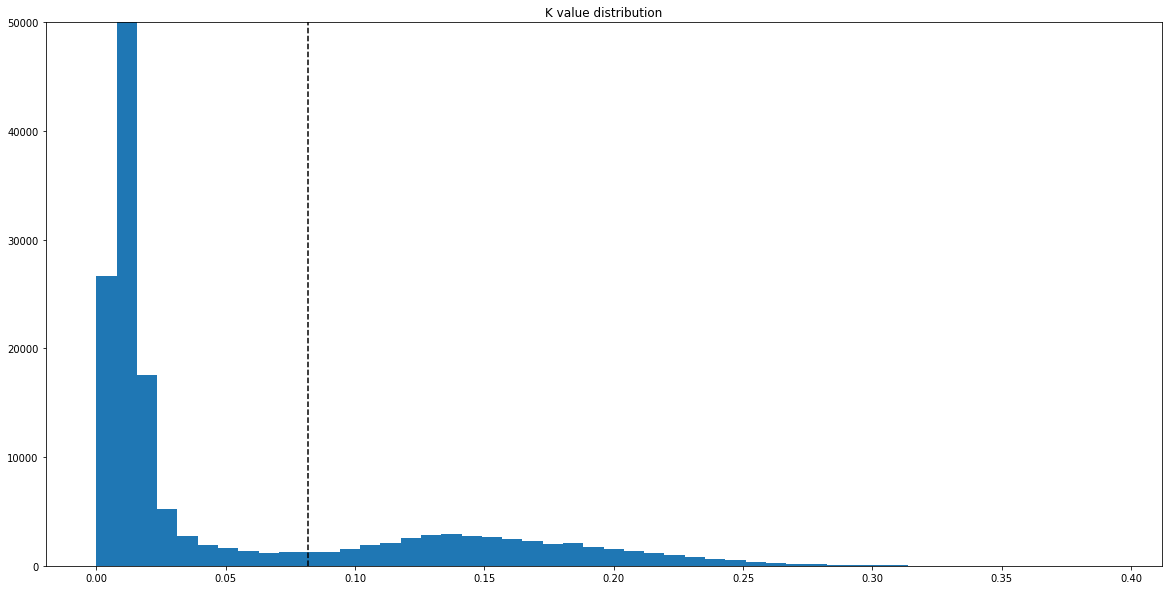

In [122]:
# visualise range of K values in hist and plot grayscale image with mask applied
plt.subplot(1,1,1)
# flatten image into array for histogram representation
im_pixels = im_gray.flatten()
# plot hist
plt.hist(im_pixels, bins=50)
# define axes
plt.vlines(otsu_threshold, 0, 100000, linestyles='--')
plt.ylim([0, 50000]) # set range for y axes to display
plt.title('K value distribution')

# visualise grayscale image with and withoutmask filter applied in colour
plt.subplot(1,2,1)


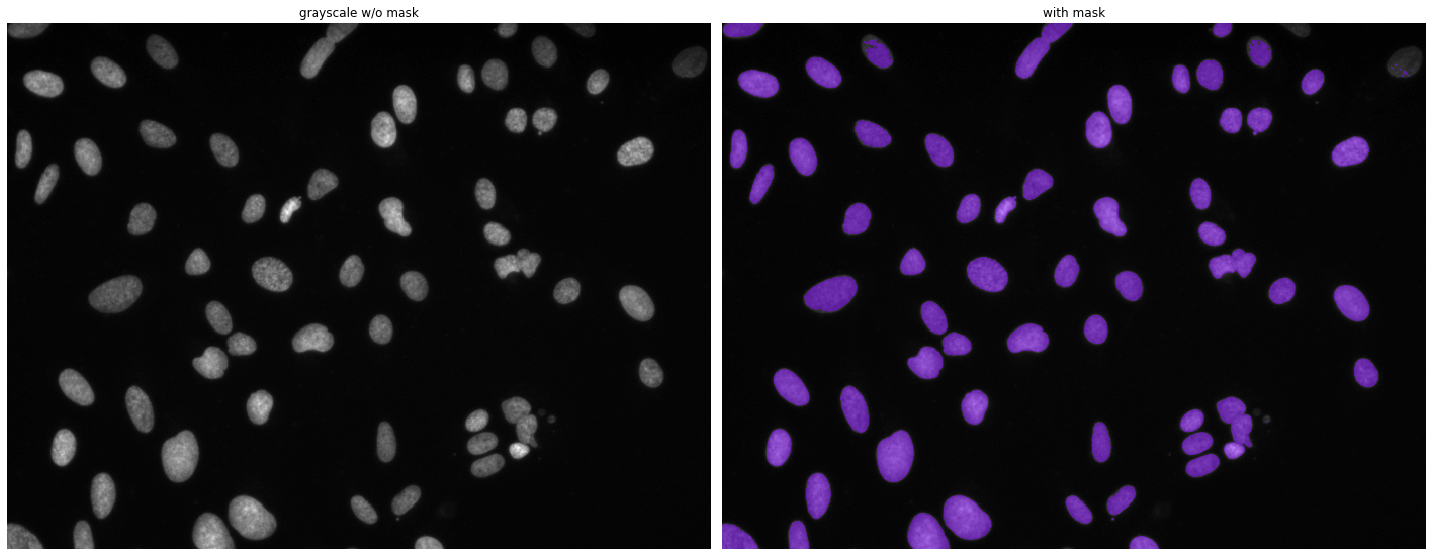

In [123]:
# plot grayscale clipped image without mask
plt.subplot(1,2,1)
plt.imshow(im_gray, cmap='gray') # define colour map as gray to render image in range [0,1] K values
plt.axis('off')
plt.title('grayscale w/o mask')

# plot image with mask
plt.subplot(1,2,2)
mask_layer = np.where(mask, mask, np.nan)
plt.imshow(im_gray, cmap='gray') # bottom layer
plt.imshow(mask_layer, cmap='rainbow', alpha=0.5) # top layer with mask
plt.axis('off')
plt.title('with mask')

plt.tight_layout()
plt.show()

### results
otsu is a very basic method for bimodal value representation. objects in top right and bottom right have been missed due to simplistic threshold value.

// Good to know this simple processing method.